
### Part 1)
- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data. You can select two features for x and y axes at a time and color the samples according to their classes. You are not expected to try all pairs, which would be too many. But please show a few examples. 
- Also use box plots to look at the data. Please show that you are able to examine some features (not all them are necessary).
- Create a training and test set (with shuffling).
- Train a **decision tree classifier** using the training set.
- What are the top 5 most important (discriminative) features?
- Train a **logistic regression model** using the training set.
- Which model (DT or LR) performed better on the test set? Note: You can use score() method of built-in classifiers to compare.


In [178]:
import pandas as pd
import numpy as np
import random
from sklearn import datasets
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree as tr
from sklearn.utils import shuffle

In [179]:
# Load the breast cancer dataset using datasets.load_breast_cancer()
data = datasets.load_breast_cancer()
breast_df = pd.DataFrame(data=np.c_[data['data'], data['target']], columns=list(data['feature_names']) + ['target'])
# breast_df # Show the dataframe

<AxesSubplot: xlabel='worst fractal dimension', ylabel='worst compactness'>

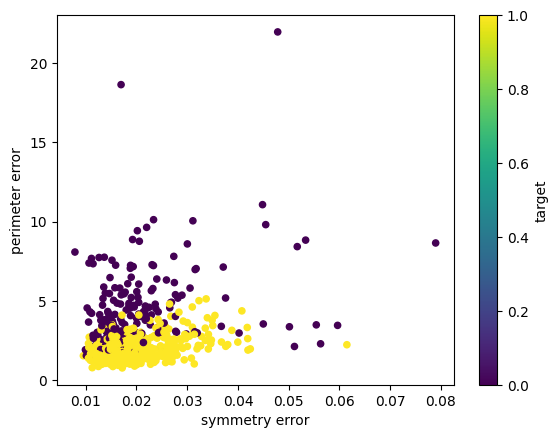

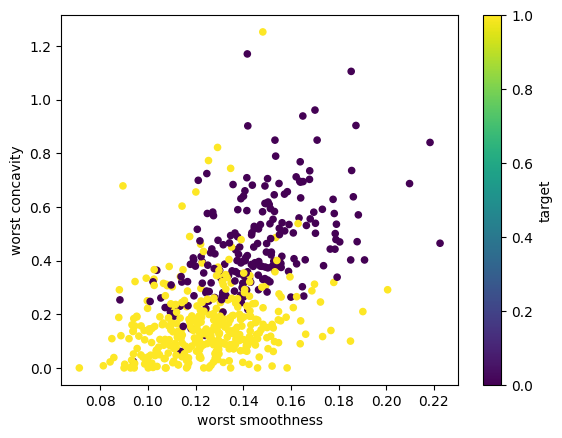

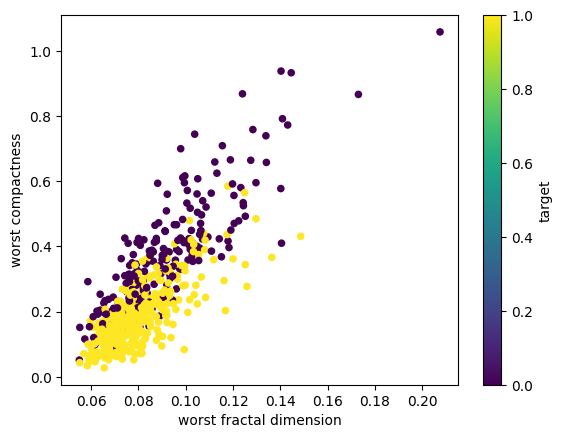

In [180]:
#Use scatter plots to look at the data. You can select two features for x and y axes at a time and color the samples according to their classes. You are not expected to try all pairs, which would be too many. But please show a few examples.
breast_df.plot.scatter(x='symmetry error', y='perimeter error', s=20, c='target', colormap='viridis')
breast_df.plot.scatter(x='worst smoothness', y='worst concavity', s=20, c='target', colormap='viridis')
breast_df.plot.scatter(x='worst fractal dimension', y='worst compactness', s=20, c='target', colormap='viridis')

<AxesSubplot: >

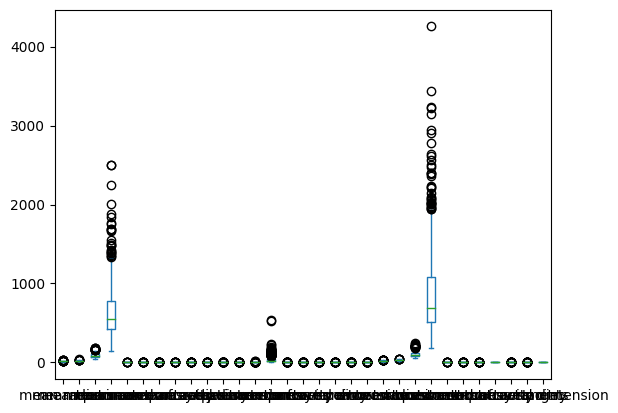

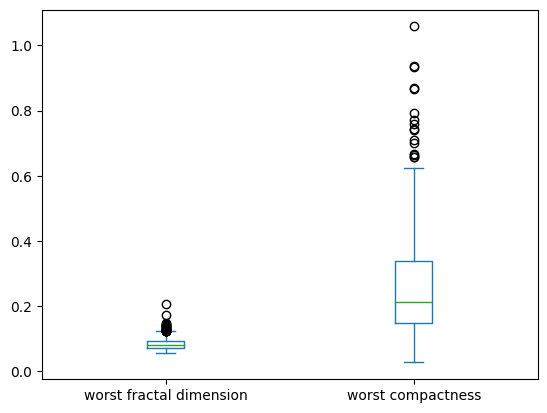

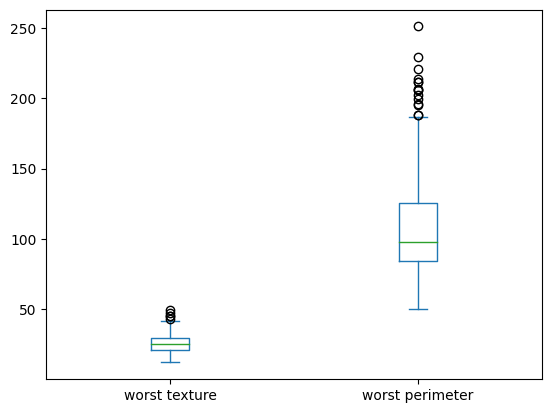

In [181]:
# Also use box plots to look at the data. Please show that you are able to examine some features (not all them are necessary).
breast_df.plot.box()  # 30 feature + 1 target

# I printed it out in binary(2 feature at a time) to compare the effects of different features
breast_df[['worst fractal dimension', 'worst compactness']].plot.box()
breast_df[['worst texture', 'worst perimeter']].plot.box()

In [182]:
# Create a training and test set (with shuffling).
# train_test_split function shuffles if shuffle parameter is true and seed value is given
# The shuffle function shown in the lesson does the same thing, I used it in the 2nd part to illustrate it.
train_df, test_df = train_test_split(breast_df, shuffle=True, random_state=random.seed())  #75% train is default

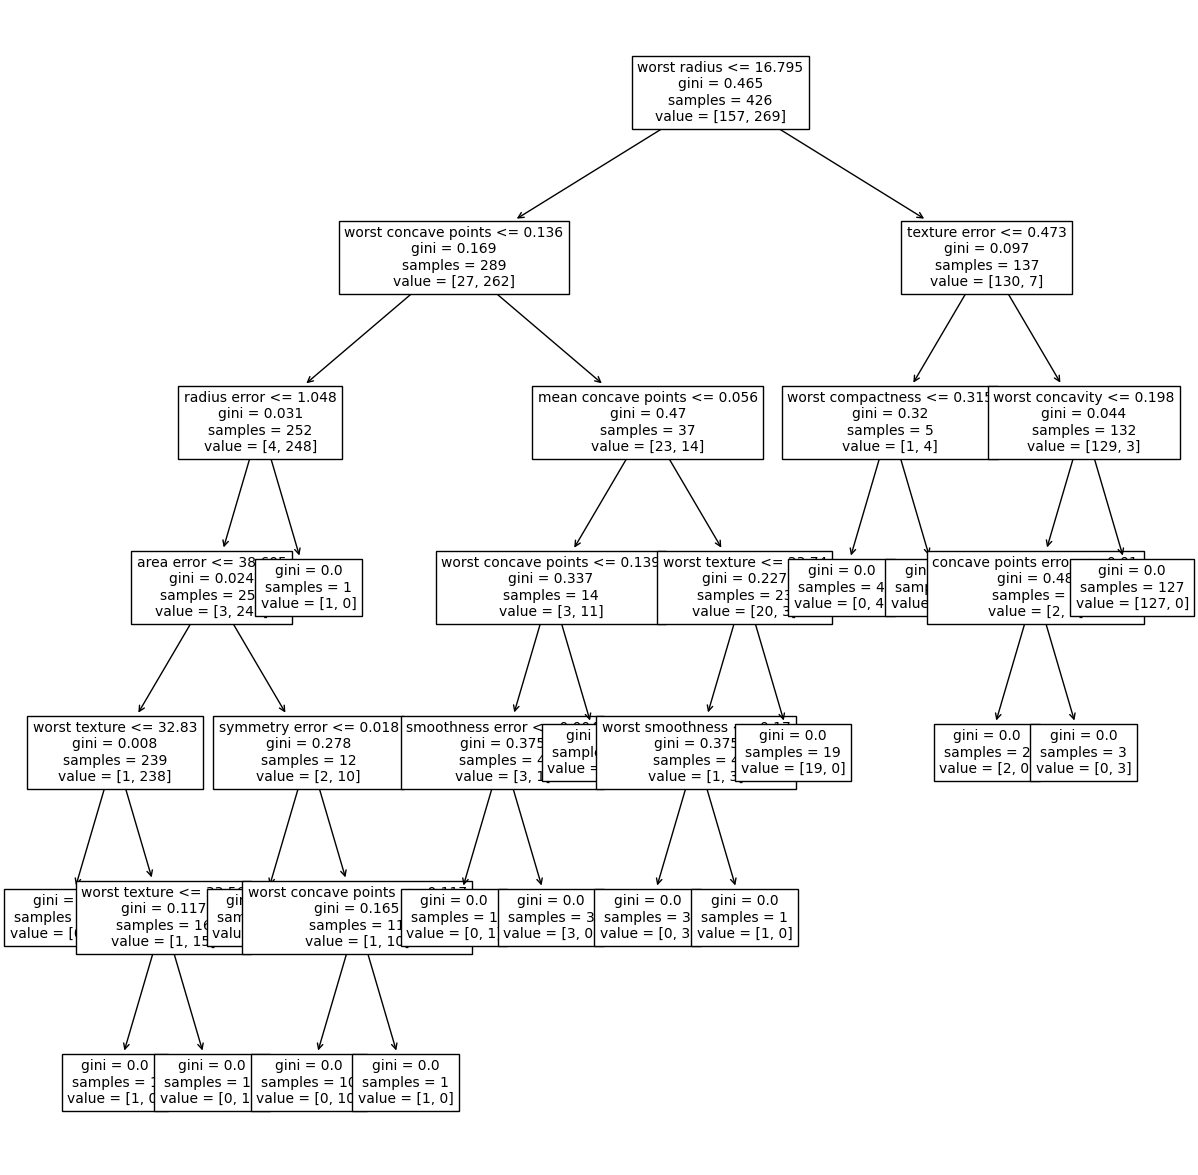

In [183]:
# Train a decision tree classifier using the training set.
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(train_df.drop('target', axis=1), train_df['target'])  #equivalent to tree.fit(X,y)
pyplot.figure(figsize=(15, 15))
tr.plot_tree(tree, feature_names=data['feature_names'], fontsize=10)
pyplot.show()

    feature_importances            feature_names
0              0.000000              mean radius
1              0.000000             mean texture
2              0.000000           mean perimeter
3              0.000000                mean area
4              0.000000          mean smoothness
5              0.000000         mean compactness
6              0.000000           mean concavity
7              0.037693      mean concave points
8              0.000000            mean symmetry
9              0.000000   mean fractal dimension
10             0.009808             radius error
11             0.029358            texture error
12             0.000000          perimeter error
13             0.003043               area error
14             0.007565         smoothness error
15             0.000000        compactness error
16             0.000000          concavity error
17             0.012104     concave points error
18             0.007642           symmetry error
19             0.000

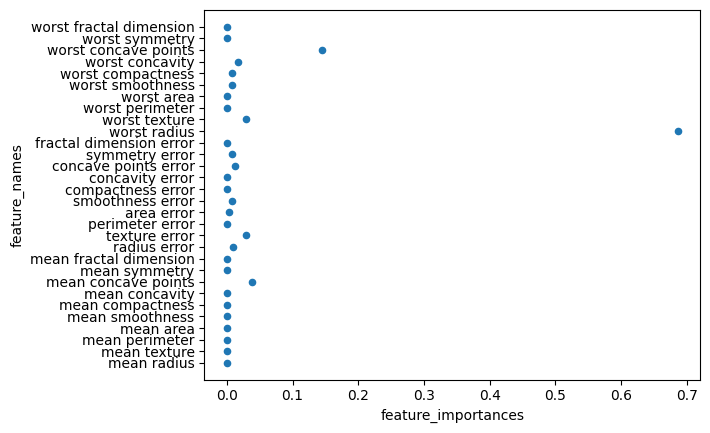

In [184]:
# What are the top 5 most important (discriminative) features?
dataframe = {'feature_importances': tree.feature_importances_, 'feature_names': data.feature_names}
df = pd.DataFrame(dataframe)
df.plot(x='feature_importances', y='feature_names', kind='scatter')
print(df)

# Every time I run the program, the results vary. But generally speaking, I printed the names numerically and then sequentially with "tree.feature_importances_".
# If we index the points and names, we can also access the names of the most important ones.
# I'm going to list you the results I have now.
# 1) 0.706401     worst concave points
# 2) 0.084246     worst radius
# 3) 0.057460     mean texture
# 4) 0.035876     concavity error
# 5) 0.020742     perimeter error

In [185]:
# Train a logistic regression model using the training set.
lr_orig = LogisticRegression(C=0.01, max_iter=1000)
lr_orig.fit(train_df.drop(['target'], axis=1), train_df['target'])

LogisticRegression(C=0.01, max_iter=1000)

In [310]:
# Which model (DT or LR) performed better on the test set? Note: You can use score() method of built-in classifiers to compare.
print("Logistic regression score: ", end="")
print(lr_orig.score(test_df.drop(['target'], axis=1), test_df['target']))
print("Decision Tree score: ", end="")
print(tree.score(test_df.drop(['target'], axis=1), test_df['target']))

# Logistic regression score: 0.9790209790209791
# Decision Tree score: 0.9370629370629371
# Logistic regression is better than Decision Tree based on this dataset and experiment score
# Note: Scores which are written above do not represent precise values because we shuffle dataset every time

Logistic regression score: 0.972027972027972
Decision Tree score: 0.9230769230769231


### Part 2)

- Get *winequality_white.csv* which uploaded with the Homework file.

- Last column (quality) is the target variable.

- Train a decision tree regressor using the training set. Try different 'min_samples_split' and 'max_depth' parameters. Which ones worked best on the test set? What is the MSE on the test set with the best parameters.

In [311]:
# Get "winequality_white.csv" which uploaded with the Homework file.
dataset = pd.read_csv(r'winequality_white.csv', delimiter=";")
wine_df = pd.DataFrame(dataset)

# Shuffle is not specified in the instructions, but different results can be obtained by changing the random state.
# wine_df = shuffle(wine_df, random_state=1)
wine_train_df, wine_test_df = train_test_split(wine_df)
# wine_df # Printing the dataset

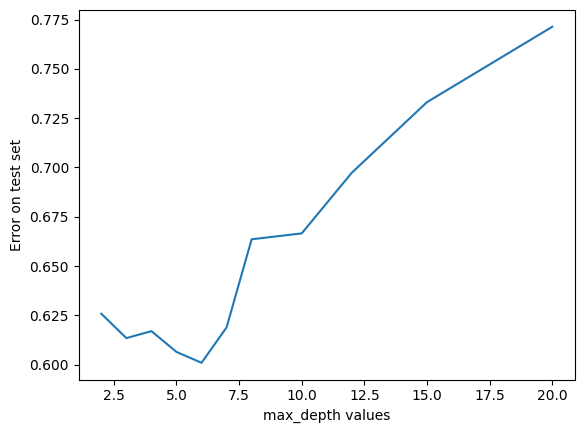

Error array: 
[0.62580568 0.61345973 0.61698041 0.6064486  0.60094334 0.61886968
 0.66356689 0.66656541 0.69733606 0.73311677 0.77134159]
Minimum error: 0.6009433426866905
Minimum error's max depth value:  6


In [312]:
# Train a decision tree regressor using the training set. Try different 'min_samples_split' and 'max_depth' parameters.
# Which ones worked best on the test set? What is the MSE on the test set with the best parameters.

# max_depth change
mdepths = [2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20]  # Different values are defined for max depth
errors = np.zeros(11)
index = 0

#There are two different methods in the examples shown.
# The first is to find the optimum with the lowest error rate, and the second is to find the optimum over the score.
# I found the optimum based on the one with the least error.
# If you want to try the other way uncomment the reg.score line and select the maximum
for d in mdepths:
    tree_reg = DecisionTreeRegressor(max_depth=d, min_samples_split=5)
    tree_reg.fit(wine_train_df.drop('quality', axis=1), wine_train_df['quality'])
    u = mean_squared_error(tree_reg.predict(wine_test_df.drop('quality', axis=1)), wine_test_df['quality'])
    # u=tree_reg.score(wine_test_df.drop('quality',axis=1), wine_test_df['quality'])
    errors[index] = u
    index += 1

x = np.array(range(0, 11))
pyplot.plot(mdepths, errors)
pyplot.xlabel('max_depth values')
pyplot.ylabel('Error on test set')
pyplot.show()
print("Error array: ")
print(errors)

tmp = min(errors)
print("Minimum error:", tmp)
errorsToArray = errors.tolist()
index = errorsToArray.index(tmp)
md = mdepths[index]
print("Minimum error's max depth value: ", md)
# If we look at the listed error rates, we can say that the optimum is generally around 6 or so.

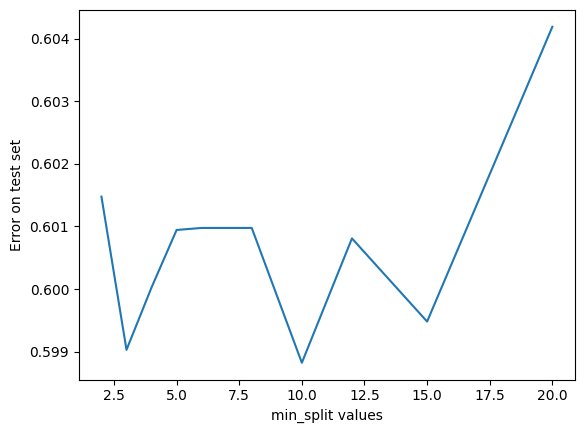

Error array: 
[0.60147622 0.59902724 0.60002498 0.60094334 0.600976   0.600976
 0.600976   0.59882034 0.60080864 0.59947928 0.60419153]
Minimum error: 0.5988203428820823
Minimum error's min sample split value:  10


In [313]:
# min_samples_split change
mdepths = [2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20]  # Different values are defined for min samples split
errors = np.zeros(11)
index = 0

for d in mdepths:
    tree_reg = DecisionTreeRegressor(max_depth=6, min_samples_split=d)
    tree_reg.fit(wine_train_df.drop('quality', axis=1), wine_train_df['quality'])
    u = mean_squared_error(tree_reg.predict(wine_test_df.drop('quality', axis=1)), wine_test_df['quality'])
    # u=tree_reg.score(wine_test_df.drop('quality',axis=1), wine_test_df['quality'])
    errors[index] = u
    index += 1

x = np.array(range(0, 11))
pyplot.plot(mdepths, errors)
pyplot.xlabel('min_split values')
pyplot.ylabel('Error on test set')
pyplot.show()
print("Error array: ")
print(errors)

# I found the minimum error and its variable value and will use it in the next block.
tmp = min(errors)
print("Minimum error:", tmp)
errorsToArray = errors.tolist()
index = errorsToArray.index(tmp)
mss = mdepths[index]
print("Minimum error's min sample split value: ", mss)
# If we look at the listed error rates, we can say that the optimum is generally around 10 or so.
# It could be 8,10,12, but I got the average one as 10

In [314]:
# max depth md (generally 6)       min sample split mss (generally 10)
tree_reg = DecisionTreeRegressor(max_depth=md, min_samples_split=mss)
tree_reg.fit(wine_train_df.drop('quality', axis=1), wine_train_df['quality'])
u = mean_squared_error(tree_reg.predict(wine_test_df.drop('quality', axis=1)), wine_test_df['quality'])

print(u)
# Score is changing between 0.54 and 0.60

0.5988203428820823


In [315]:
# REFERENCES
# https://datatofish.com/plot-dataframe-pandas/ -> Print the importance of features
# https://towardsdatascience.com/how-to-read-csv-file-using-pandas-ab1f5e7e7b58 -> csv file to pd.Dataframe